<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/Regressao_Linear_Simples_com_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf

In [21]:
df = pd.read_excel('aprovacao_alunos.xlsx')
df.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [22]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [24]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


<Axes: xlabel='ano_2015', ylabel='Count'>

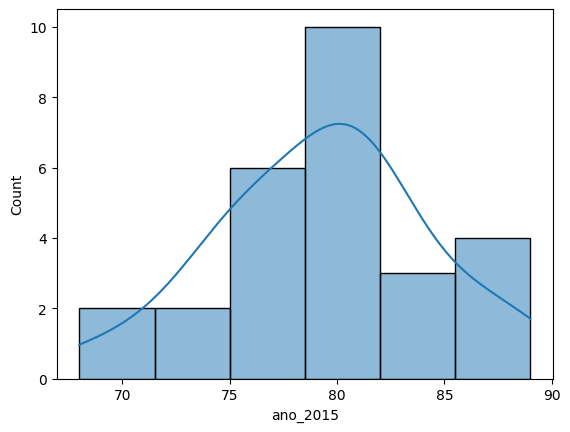

In [25]:
sns.histplot(data=df, x='ano_2015', kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

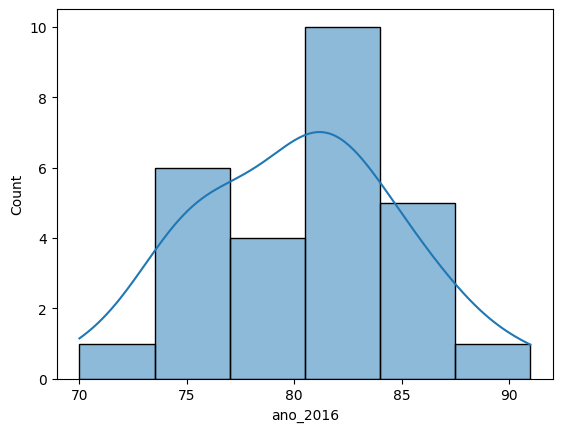

In [26]:
sns.histplot(data=df, x='ano_2016', kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

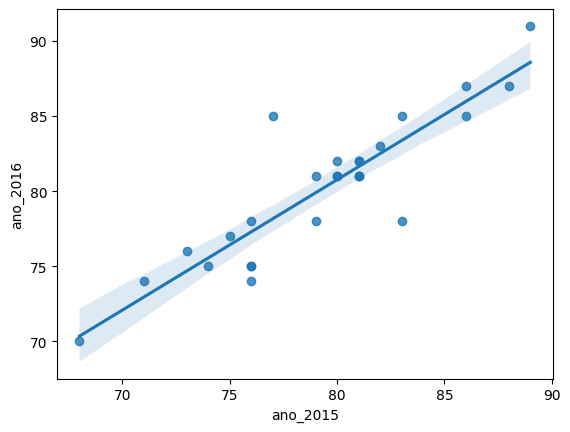

In [27]:
sns.regplot(x='ano_2015', y='ano_2016', data=df)

In [28]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [29]:
df_scaled.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


In [30]:
function = 'ano_2016 ~ ano_2015'
model = smf.ols(formula=function, data=df_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.02e-10
Time:                        09:39:11   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7

In [33]:
x = df_scaled[['ano_2015']]
y = df_scaled[['ano_2016']]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [36]:
r_sq = lr.score(x_train, y_train)
print(f'R²: {r_sq}')

R²: 0.8800910056640281


In [38]:
y_pred_train = lr.predict(x_train)
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE: ', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE:  0.06313092719197842
MSE:  0.006947385853516443
RMSE:  0.08335097991935334


In [40]:
y_pred_train = lr.predict(x_test)
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_train))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_train)))

MAE:  0.10156392395533688
MSE:  0.02234792217796548
RMSE:  0.14949221443929941
